<a href="https://colab.research.google.com/github/alantepeemin/heart-attack-in-japan-youth-vs-adult/blob/main/MachineLearningFinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

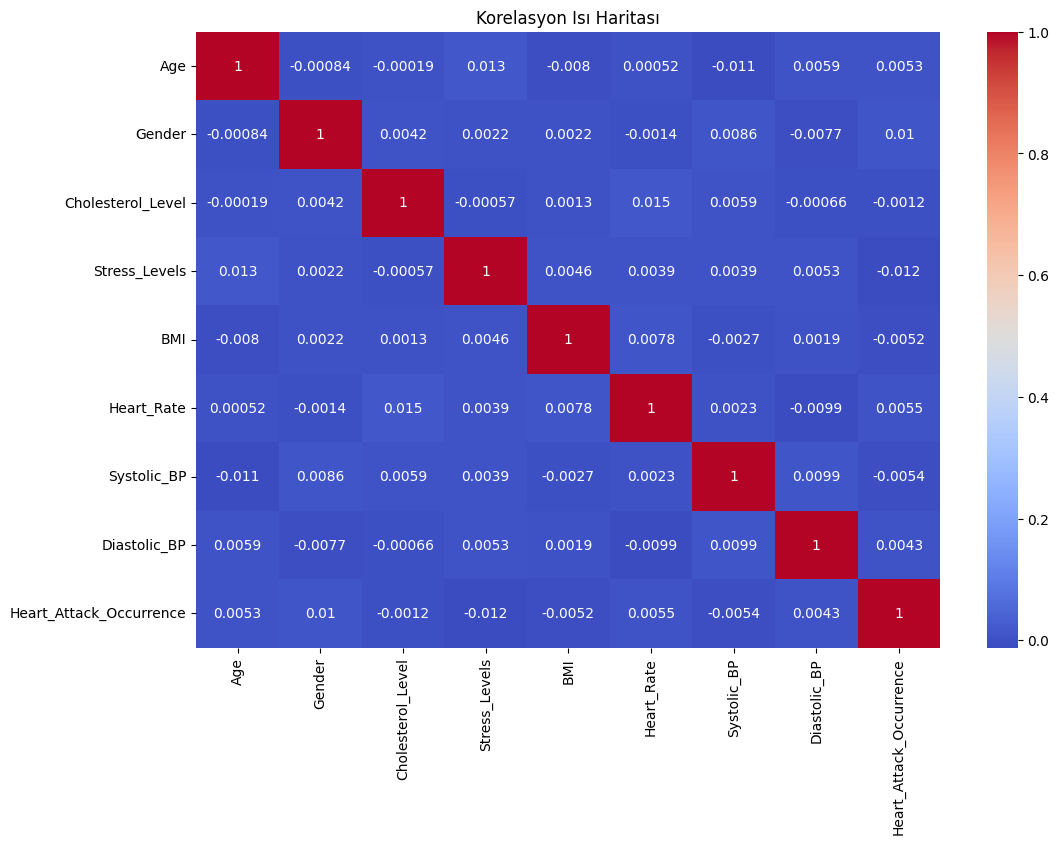

Random Forest Doğruluk (Accuracy): 0.8986666666666666


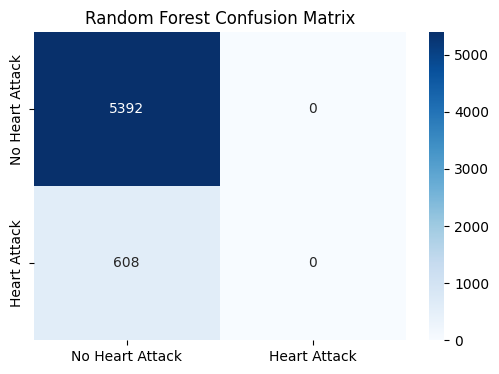

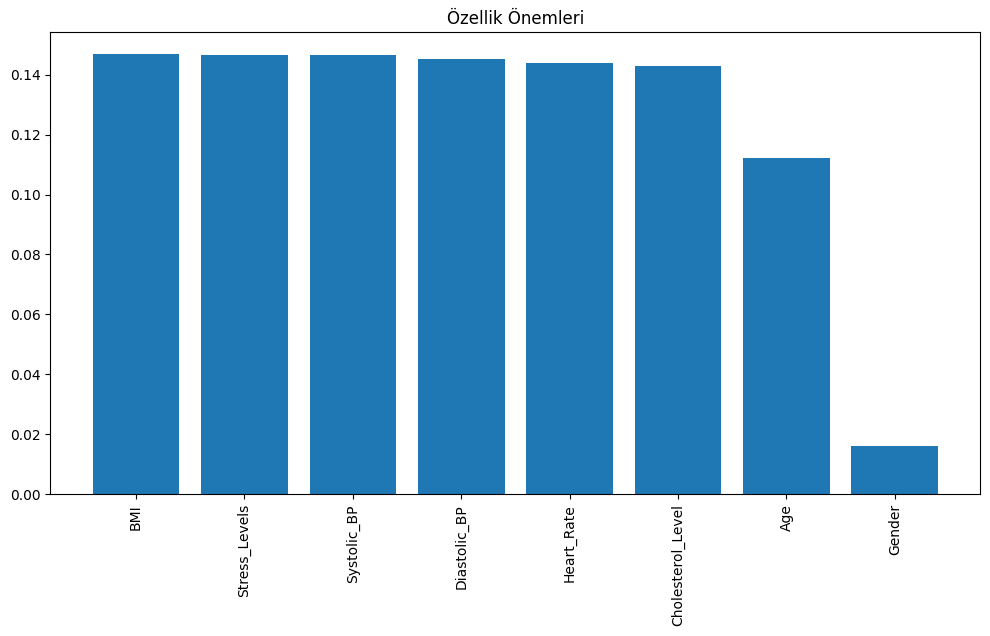

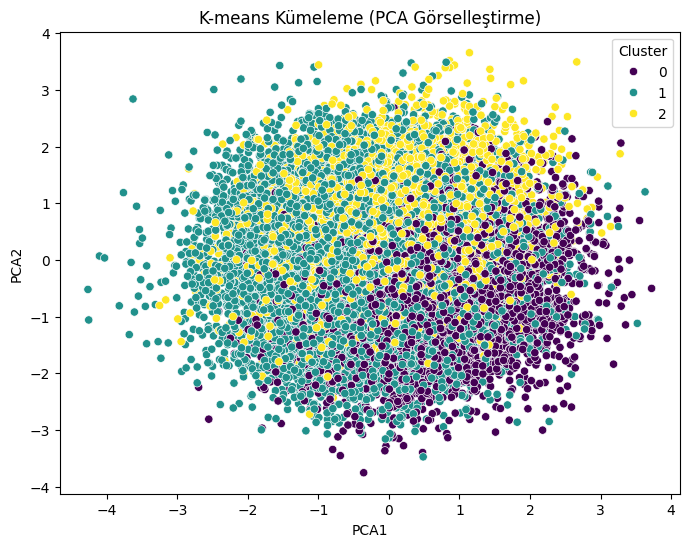

Logistic Regression Doğruluk (Accuracy): 0.5088333333333334


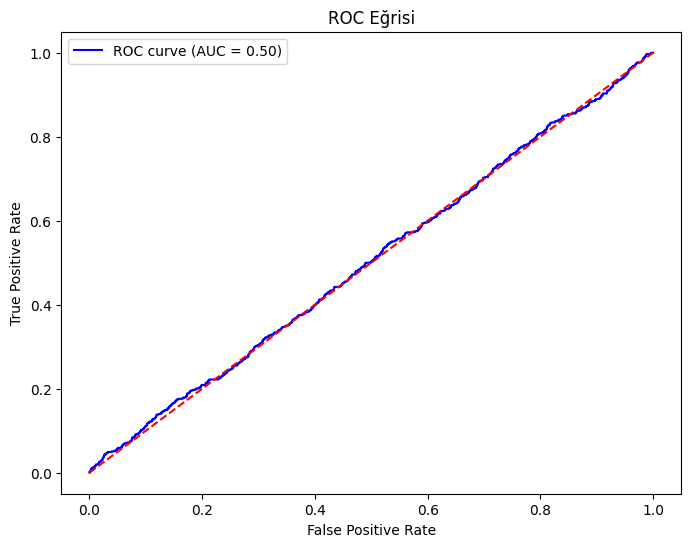

In [60]:
# Gerekli kütüphaneler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve, silhouette_score
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings('ignore')

# Veri yükleme ve ön işleme
df = pd.read_csv('/content/japan_heart_attack_dataset.csv')
df.drop(columns=[f'Extra_Column_{i}' for i in range(1, 16)], inplace=True)  # Gereksiz sütunlar kaldırıldı


# Kategorik değişkenlerin kodlanması
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})
df['Heart_Attack_Occurrence'] = df['Heart_Attack_Occurrence'].map({'Yes': 1, 'No': 0})

# Verilerin incelenmesi
numeric_df = df.select_dtypes(include=[np.number])
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Korelasyon Isı Haritası')
plt.show()

# Verilerin ölçeklenmesi
scaler = StandardScaler()
scaled_features = scaler.fit_transform(numeric_df.drop(columns=['Heart_Attack_Occurrence']))
scaled_df = pd.DataFrame(scaled_features, columns=numeric_df.columns[:-1])
scaled_df['Heart_Attack_Occurrence'] = numeric_df['Heart_Attack_Occurrence']

# Veri setinin eğitim ve test olarak bölünmesi
X = scaled_df.drop(columns=['Heart_Attack_Occurrence'])
y = scaled_df['Heart_Attack_Occurrence']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest modeli
rf_model = RandomForestClassifier(random_state=42,class_weight='balanced')
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

print(f"Random Forest Doğruluk (Accuracy): {accuracy_rf}")

# Confusion matrix görselleştirme
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_rf, annot=True, fmt="d", cmap="Blues", xticklabels=["No Heart Attack", "Heart Attack"], yticklabels=["No Heart Attack", "Heart Attack"])
plt.title("Random Forest Confusion Matrix")
plt.show()

# Özellik önemini görselleştirme
importances_rf = rf_model.feature_importances_
indices_rf = np.argsort(importances_rf)[::-1]
plt.figure(figsize=(12, 6))
plt.title("Özellik Önemleri")
plt.bar(range(X_train.shape[1]), importances_rf[indices_rf], align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices_rf], rotation=90)
plt.show()

# K-means kümeleme
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(scaled_features)
df['Cluster'] = kmeans.labels_

# K-means görselleştirme
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_features)
df['PCA1'] = pca_components[:, 0]
df['PCA2'] = pca_components[:, 1]

plt.figure(figsize=(8, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=df, palette='viridis')
plt.title('K-means Kümeleme (PCA Görselleştirme)')
plt.show()

# Logistic Regression modeli
log_reg = LogisticRegression(random_state=42, class_weight='balanced')
log_reg.fit(X_train, y_train)
y_pred_logreg = log_reg.predict(X_test)
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)

print(f"Logistic Regression Doğruluk (Accuracy): {accuracy_logreg}")

# Model performansı değerlendirme (ROC-AUC, Confusion Matrix)
roc_auc_logreg = roc_auc_score(y_test, log_reg.predict_proba(X_test)[:, 1])
fpr_logreg, tpr_logreg, _ = roc_curve(y_test, log_reg.predict_proba(X_test)[:, 1])

plt.figure(figsize=(8, 6))
plt.plot(fpr_logreg, tpr_logreg, color='blue', label=f'ROC curve (AUC = {roc_auc_logreg:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.title('ROC Eğrisi')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


In [61]:
# Ortalama Kan Basıncı (Mean BP) hesaplanması
df['Mean_BP'] = (df['Systolic_BP'] + df['Diastolic_BP']) / 2


In [62]:
# Tüm sayısal sütunlar için ölçeklendirme
scaler = StandardScaler()
numeric_columns = df.select_dtypes(include=[np.number]).columns
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])


Logistic Regression Accuracy: 0.5088333333333334
Logistic Regression Precision: 0.10288624787775891
Logistic Regression Recall: 0.49835526315789475
Logistic Regression F1 Score: 0.17056009006473402
Logistic Regression ROC-AUC: 0.5029200789668906


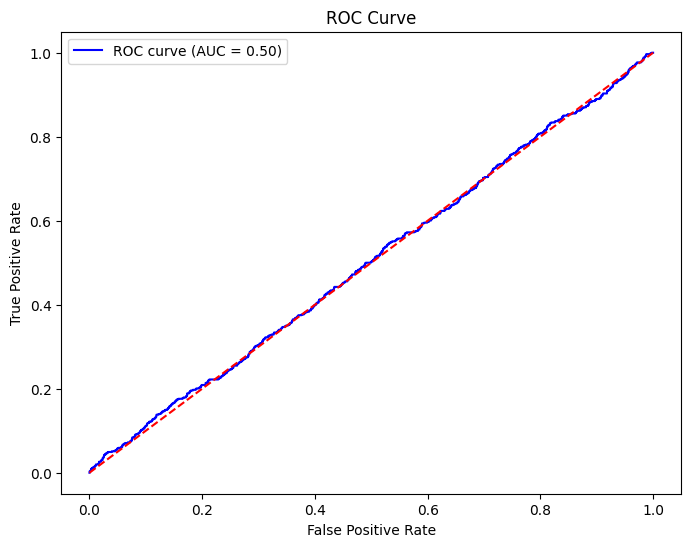

In [63]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Logistic Regression modelinin performans değerlendirmesi
y_pred_logreg = log_reg.predict(X_test)
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
precision_logreg = precision_score(y_test, y_pred_logreg)
recall_logreg = recall_score(y_test, y_pred_logreg)
f1_logreg = f1_score(y_test, y_pred_logreg)
roc_auc_logreg = roc_auc_score(y_test, log_reg.predict_proba(X_test)[:, 1])

print(f"Logistic Regression Accuracy: {accuracy_logreg}")
print(f"Logistic Regression Precision: {precision_logreg}")
print(f"Logistic Regression Recall: {recall_logreg}")
print(f"Logistic Regression F1 Score: {f1_logreg}")
print(f"Logistic Regression ROC-AUC: {roc_auc_logreg}")

# ROC Eğrisi ve AUC Skoru:
roc_auc_logreg = roc_auc_score(y_test, log_reg.predict_proba(X_test)[:, 1])
fpr_logreg, tpr_logreg, _ = roc_curve(y_test, log_reg.predict_proba(X_test)[:, 1])

plt.figure(figsize=(8, 6))
plt.plot(fpr_logreg, tpr_logreg, color='blue', label=f'ROC curve (AUC = {roc_auc_logreg:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


In [64]:
# Logistic Regression performans değerlendirmesi (Negatif sınıf odaklı)
conf_matrix = confusion_matrix(y_test, y_pred_logreg)
TN = conf_matrix[0, 0]
FP = conf_matrix[0, 1]
FN = conf_matrix[1, 0]
TP = conf_matrix[1, 1]

specificity_logreg = TN / (TN + FP)
npv_logreg = TN / (TN + FN)

print(f"Logistic Regression Specificity: {specificity_logreg}")
print(f"Logistic Regression NPV: {npv_logreg}")


Logistic Regression Specificity: 0.5100148367952523
Logistic Regression NPV: 0.900163666121113


Random Forest Accuracy: 0.8986666666666666
Random Forest Precision: 0.0
Random Forest Recall: 0.0
Random Forest F1 Score: 0.0
Random Forest ROC-AUC: 0.5159545879372951


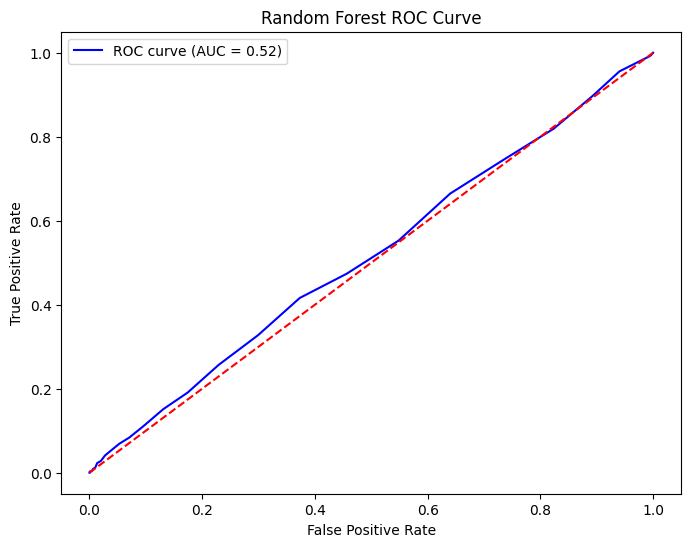

In [65]:
# Random Forest tahminleri
y_pred_rf = rf_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, rf_model.predict_proba(X_test)[:, 1])

print(f"Random Forest Accuracy: {accuracy_rf}")
print(f"Random Forest Precision: {precision_rf}")
print(f"Random Forest Recall: {recall_rf}")
print(f"Random Forest F1 Score: {f1_rf}")
print(f"Random Forest ROC-AUC: {roc_auc_rf}")

# ROC Eğrisi ve AUC Skoru
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]
roc_auc_rf = roc_auc_score(y_test, y_prob_rf)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)

plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='blue', label=f'ROC curve (AUC = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.title('Random Forest ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


In [66]:
conf_matrix = confusion_matrix(y_test, y_pred_rf)  # Random Forest için örnek
print(conf_matrix)

[[5392    0]
 [ 608    0]]


In [67]:
# Random Forest performans değerlendirmesi (Negatif sınıf odaklı)
conf_matrix = confusion_matrix(y_test, y_pred_rf)
TN = conf_matrix[0, 0]
FP = conf_matrix[0, 1]
FN = conf_matrix[1, 0]
TP = conf_matrix[1, 1]

specificity_rf = TN / (TN + FP)
npv_rf = TN / (TN + FN)

print(f"Random Forest Specificity: {specificity_rf}")
print(f"Random Forest NPV: {npv_rf}")


Random Forest Specificity: 1.0
Random Forest NPV: 0.8986666666666666


KNN Accuracy: 0.892
KNN Precision: 0.06521739130434782
KNN Recall: 0.004934210526315789
KNN F1 Score: 0.009174311926605505
KNN ROC-AUC: 0.49827168417148204


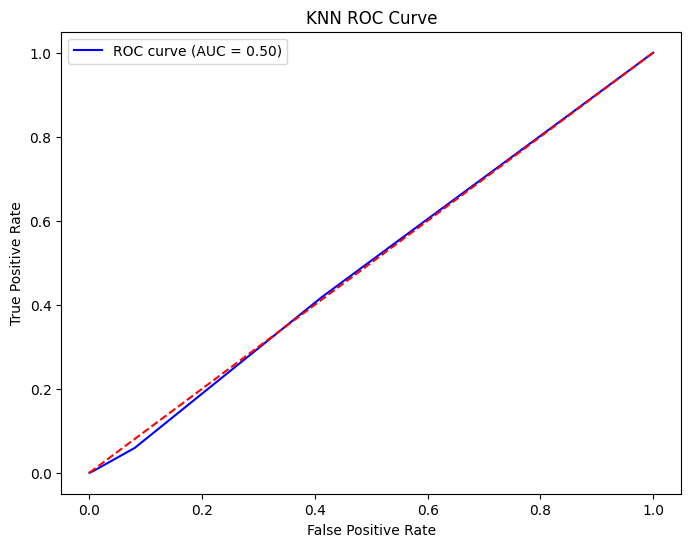

In [68]:
# KNN modeli tanımlama
knn = KNeighborsClassifier(n_neighbors=5)  # Varsayılan komşu sayısı 5
knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)
roc_auc_knn = roc_auc_score(y_test, knn.predict_proba(X_test)[:, 1])

print(f"KNN Accuracy: {accuracy_knn}")
print(f"KNN Precision: {precision_knn}")
print(f"KNN Recall: {recall_knn}")
print(f"KNN F1 Score: {f1_knn}")
print(f"KNN ROC-AUC: {roc_auc_knn}")

# ROC Eğrisi ve AUC Skoru
y_prob_knn = knn.predict_proba(X_test)[:, 1]
roc_auc_knn = roc_auc_score(y_test, y_prob_knn)
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_prob_knn)

plt.figure(figsize=(8, 6))
plt.plot(fpr_knn, tpr_knn, color='blue', label=f'ROC curve (AUC = {roc_auc_knn:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.title('KNN ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


In [69]:
# KNN performans değerlendirmesi (Negatif sınıf odaklı)
conf_matrix = confusion_matrix(y_test, y_pred_knn)
TN = conf_matrix[0, 0]
FP = conf_matrix[0, 1]
FN = conf_matrix[1, 0]
TP = conf_matrix[1, 1]

specificity_knn = TN / (TN + FP)
npv_knn = TN / (TN + FN)

print(f"KNN Specificity: {specificity_knn}")
print(f"KNN NPV: {npv_knn}")


KNN Specificity: 0.9920252225519288
KNN NPV: 0.8983876385623111


Gradient Boosting Accuracy: 0.8981666666666667
Gradient Boosting Precision: 0.0
Gradient Boosting Recall: 0.0
Gradient Boosting F1 Score: 0.0
Gradient Boosting ROC-AUC: 0.4856504946411838


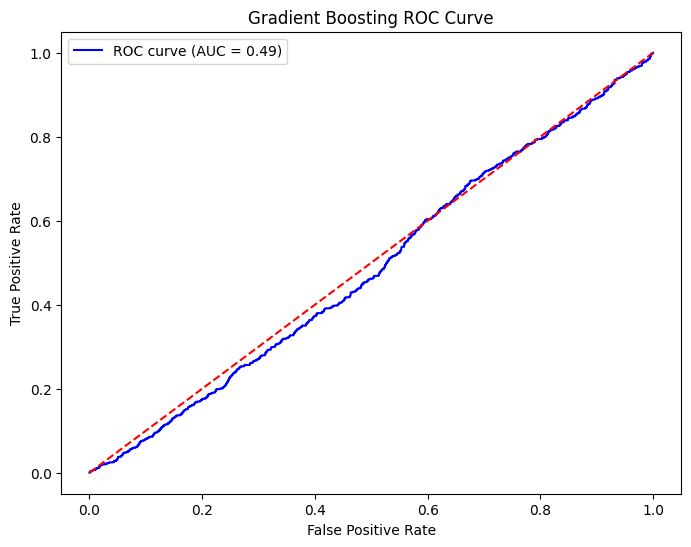

In [70]:
from sklearn.ensemble import GradientBoostingClassifier

# Gradient Boosting modeli tanımlama
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)

y_pred_gb = gb_model.predict(X_test)
accuracy_gb = accuracy_score(y_test, y_pred_gb)
precision_gb = precision_score(y_test, y_pred_gb)
recall_gb = recall_score(y_test, y_pred_gb)
f1_gb = f1_score(y_test, y_pred_gb)
roc_auc_gb = roc_auc_score(y_test, gb_model.predict_proba(X_test)[:, 1])

print(f"Gradient Boosting Accuracy: {accuracy_gb}")
print(f"Gradient Boosting Precision: {precision_gb}")
print(f"Gradient Boosting Recall: {recall_gb}")
print(f"Gradient Boosting F1 Score: {f1_gb}")
print(f"Gradient Boosting ROC-AUC: {roc_auc_gb}")

# ROC Eğrisi ve AUC Skoru
y_prob_gb = gb_model.predict_proba(X_test)[:, 1]
roc_auc_gb = roc_auc_score(y_test, y_prob_gb)
fpr_gb, tpr_gb, _ = roc_curve(y_test, y_prob_gb)

plt.figure(figsize=(8, 6))
plt.plot(fpr_gb, tpr_gb, color='blue', label=f'ROC curve (AUC = {roc_auc_gb:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.title('Gradient Boosting ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


In [71]:
from sklearn.metrics import confusion_matrix

# Confusion Matrix ile negatif sınıf metriklerini hesaplama
conf_matrix = confusion_matrix(y_test, y_pred_gb)  # Gradient Boosting için örnek
TN = conf_matrix[0, 0]  # True Negatives
FP = conf_matrix[0, 1]  # False Positives
FN = conf_matrix[1, 0]  # False Negatives
TP = conf_matrix[1, 1]  # True Positives

# Specificity (Özgüllük) hesaplama
specificity_gb = TN / (TN + FP)
print(f"Gradient Boosting Specificity: {specificity_gb}")

# Negative Predictive Value (NPV) hesaplama
npv_gb = TN / (TN + FN)
print(f"Gradient Boosting NPV: {npv_gb}")


Gradient Boosting Specificity: 0.9994436201780416
Gradient Boosting NPV: 0.8986159746539937


In [72]:
import pandas as pd

# Her algoritma için performans metriklerini hesaplayalım
results = {
    'Algorithm': ['Logistic Regression', 'Random Forest', 'Gradient Boosting', 'KNN'],
    'Accuracy': [accuracy_logreg, accuracy_rf, accuracy_gb, accuracy_knn],
    'Precision': [precision_logreg, precision_rf, precision_gb, precision_knn],
    'Recall': [recall_logreg, recall_rf, recall_gb, recall_knn],
    'F1-Score': [f1_logreg, f1_rf, f1_gb, f1_knn],
    'ROC-AUC': [roc_auc_logreg, roc_auc_rf, roc_auc_gb, roc_auc_knn],
    'Specificity': [specificity_logreg, specificity_rf, specificity_gb, specificity_knn],
    'NPV': [npv_logreg, npv_rf, npv_gb, npv_knn]
}

# Tüm sonuçları bir DataFrame'e dönüştürelim
results_df = pd.DataFrame(results)

# Tabloyu yazdır
print(results_df)


             Algorithm  Accuracy  Precision    Recall  F1-Score   ROC-AUC  \
0  Logistic Regression  0.508833   0.102886  0.498355  0.170560  0.502920   
1        Random Forest  0.898667   0.000000  0.000000  0.000000  0.515955   
2    Gradient Boosting  0.898167   0.000000  0.000000  0.000000  0.485650   
3                  KNN  0.892000   0.065217  0.004934  0.009174  0.498272   

   Specificity       NPV  
0     0.510015  0.900164  
1     1.000000  0.898667  
2     0.999444  0.898616  
3     0.992025  0.898388  


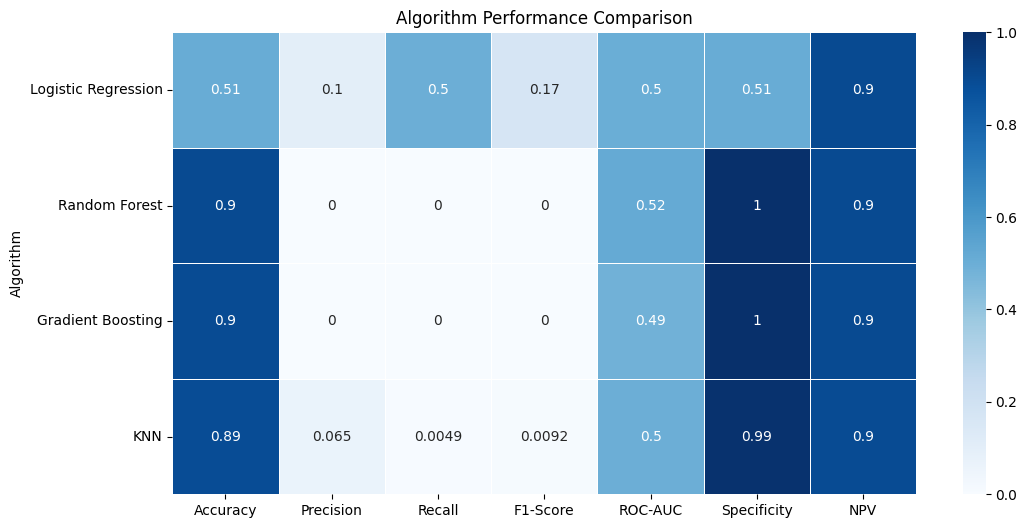

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt

# Tabloyu görselleştirme (Heatmap)
plt.figure(figsize=(12, 6))
sns.heatmap(results_df.set_index('Algorithm'), annot=True, cmap='Blues', linewidths=0.5)
plt.title('Algorithm Performance Comparison')
plt.show()
